***data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic['Proportion']= titanic['name']

***Create a pie chart presenting the male/female proportion***

In [6]:
df= titanic.groupby(['sex']).count()

In [7]:
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Proportion
sex,,,,,,,,,,,,,,
female,466,466,466,388,466,466,466,466,141,464,319,8,288,466
male,843,843,843,658,843,843,843,842,154,843,167,113,457,843


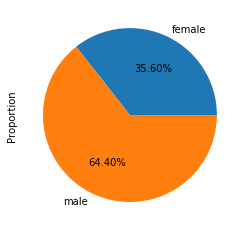

In [8]:
df.plot(df,kind='pie',y='Proportion',legend=False,autopct='%0.2f%%')

***2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender***

In [9]:
Groups=titanic.groupby(['sex'])

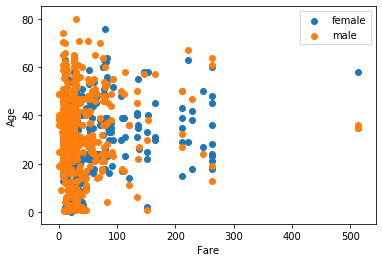

In [17]:
for x,y in Groups:
    plt.scatter(y['fare'],y['age'],label=x)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend()

***We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.***

In [11]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [12]:
year = np.arange(len(Max)) 

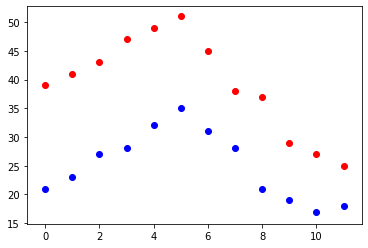

In [13]:
plt.scatter(year, Max, c='r')
plt.scatter(year, Min, c='b')

In [14]:
from scipy import optimize

def sin_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

params1, params_covariance1 = optimize.curve_fit(sin_func, year, Max)
params2, params_covariance2 = optimize.curve_fit(sin_func, year, Min)

print(params1)
print(params2)

[12.18856807  0.40912741  6.26793415 36.75343842]
[-7.80370348  0.5454179   2.2409949  25.27219674]


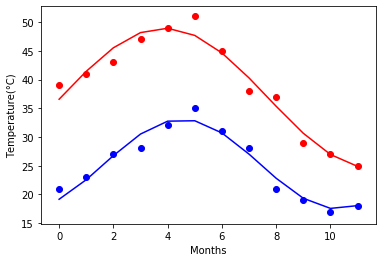

In [15]:
plt.scatter(year, Max, c='r')
plt.scatter(year, Min, c='b')
plt.plot(year, sin_func(year, params1[0], params1[1], params1[2], params1[3]), c='r')
plt.plot(year, sin_func(year, params2[0], params2[1], params2[2], params2[3]), c='b')
plt.xlabel("Months")
plt.ylabel("Temperature(°C)")

plt.show()